In [1]:
import numpy as np
import astropy as ap
import matplotlib.pyplot as plt
from read_data import *

%matplotlib inline

In [2]:
pref = '../outputs/t65/output_'
#pref = '../outputs/soft_tests/bp/outflow_alt/tilt10_tv0001_s2_t2/n512/output_'
#pref = '../outputs/extraploglog_tests/bp/outflow_alt/tilt10_loresQ_tv0001_s2_t2/n512/output_'
#pref = '../outputs/largepsi_tests/bp/outflow_alt/tilt10_tv0001_s2_t2/n512/output_'
HoR  = 1e-3
filenames = get_fn_list(pref,0,409201)
full_data = []
for i,fn in enumerate(filenames):
    print "Loading file %d..." % i
    full_data.append(build_table(fn,HoR))

Loading file 0...
Loading file 1...
Loading file 2...
Loading file 3...
Loading file 4...
Loading file 5...
Loading file 6...
Loading file 7...
Loading file 8...
Loading file 9...
Loading file 10...
Loading file 11...
Loading file 12...
Loading file 13...
Loading file 14...
Loading file 15...
Loading file 16...
Loading file 17...
Loading file 18...
Loading file 19...
Loading file 20...
Loading file 21...
Loading file 22...
Loading file 23...
Loading file 24...
Loading file 25...
Loading file 26...
Loading file 27...
Loading file 28...
Loading file 29...
Loading file 30...
Loading file 31...
Loading file 32...
Loading file 33...
Loading file 34...
Loading file 35...
Loading file 36...
Loading file 37...
Loading file 38...
Loading file 39...
Loading file 40...
Loading file 41...
Loading file 42...
Loading file 43...
Loading file 44...
Loading file 45...
Loading file 46...
Loading file 47...
Loading file 48...
Loading file 49...
Loading file 50...
Loading file 51...
Loading file 52...
Loa

IOError: ../outputs/t65/output_102.csv not found.

In [3]:
for i in range(no_file):
    full_data[i]["prec"] -= full_data[i]["prec"][-1]

NameError: name 'no_file' is not defined

In [4]:
no_file = len(full_data)

p_old = full_data[0]["prec"]
t_old = full_data[0]["t"][0]
full_data[0]["dpdt"] = np.zeros(len(full_data[0]["prec"]))
for i in range(1,no_file):
    p_new = full_data[i]["prec"]
    t_new = full_data[i]["t"][0]
    dt = t_new - t_old
    print t_new, t_old, dt
    dp = p_new - p_old
    print dp,dt
    full_data[i]["dpdt"] = dp/dt
    p_old = np.copy(p_new)
    t_old = np.copy(t_new)

43764.0 0.0 43764.0
       prec       
------------------
24108.158855928734
 23928.15885686264
 23928.15885598381
23860.811005469655
23813.902371555105
23695.363713113955
 23555.61409539431
23510.211928336943
 23436.10518138891
23427.566253544966
               ...
 6.095007812979511
 5.956899581416426
 5.821913259181396
  5.68999286410355
 5.561125607628145
 5.435493811818582
 5.314359266178476
5.2033989141956924
 5.122115214168854
 5.122114812016222
 5.122113149955738
Length = 516 rows 43764.0
87541.1 43764.0 43777.100000000006
       prec       
------------------
2879.8326538896363
2879.8326549363665
 2699.832656484741
2636.6883987344227
 2593.056686051059
2536.4939325890264
2555.6522510218274
  2525.87417716697
 2599.279657503248
 2596.941461792947
               ...
186.09481180128236
 185.9569722880008
  185.822392423081
185.69117347461864
 185.5637721982113
185.44144305538126
185.33122214805215
 185.2500564286006
185.20630433557753
 5.206306893103199
 5.206307097186023
Length 

       prec       
------------------
238.38601573507913
238.38601582589763
  418.386002795698
 400.4364766814906
 341.6495193043884
413.88569136481965
430.41580331305886
383.87107143598405
 449.2943428751023
 437.6189282649357
               ...
  5.98517301895005
 5.851501493174268
 5.720374305730118
 5.595688660594234
 5.477374709619525
 5.345188542865614
 5.208182353686695
 5.208462020319317
 5.208594547878377
 5.208592687109686
 5.208594641090471
Length = 516 rows 43807.0
2100503.0 2056806.0 43697.0
       prec       
------------------
-768.5526812745957
-768.5526777903942
-768.5526690916013
-750.9084009275684
-775.8398737355092
 -850.319026937861
-981.4312804569563
-995.2034120254466
-899.5995331616432
-880.1006736302443
               ...
 5.967557263612406
 5.834479636038736
 5.703328276270128
5.5787925424261005
 5.459186609513836
 5.335227501764393
 5.194996283561466
 5.195280637624478
5.1954315782861045
 5.195433084582191
 5.195437620816023
Length = 516 rows 43697.0
2144310.

3938431.0 3894733.0 43698.0
        prec       
-------------------
 -768.4318910344446
 -768.4318954274495
 -948.4318842985303
 -930.8438656652725
 -955.8218847364551
-1030.2560721017799
-1159.4154468231209
-1175.3883134204953
-1259.0879348795715
-1240.1812108657832
                ...
  5.852765200089721
  5.723640216727631
 5.5985519408932305
  5.481749648997038
  5.369794391381902
  5.205689292021134
  5.191621817785347
  5.191501345803147
  5.191438993741997
   5.19143516738373
  5.191432433875107
Length = 516 rows 43698.0
3982238.0 3938431.0 43807.0
       prec       
------------------
 958.2860139060213
1138.2860060801904
1138.2860032318786
1120.4975721283554
1061.7619423454598
1133.8018034412598
1149.2814409151833
1104.5962535883082
1168.9645023741832
1157.6481818383763
               ...
5.8646075705518115
 5.735820450527115
 5.610246990714302
 5.493279706061742
5.3776246442835145
 5.220130238995182
 5.204586144647351
 5.204535423531922
5.2044944754691755
 185.2044933589881
 

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in divide
  del sys.path[0]


In [135]:
init_mass = integrate_mass(full_data[0])
for i in range(1,len(full_data)):
    print (init_mass - integrate_mass(full_data[i]))/init_mass

0.006738472408614848
0.014425989711061305
0.021665333315989677
0.027956742176841947
0.03336832337915884
0.038103435752300574
0.04237314573365333
0.04631006680907167
0.050012586459654465
0.053562469206817
0.05698838263119901
0.06032849411346801
0.0635817977573502
0.06678235382261823
0.06993036288819637
0.07302413101526521
0.07608577221109294
0.07910372255139939
0.08209461800225357
0.08504308140361834
0.08797003858608092
0.09086899155105023
0.09373399641154191
0.09658177150839264
0.09939718953456136
0.10219265084896416
0.10496190043016626
0.10771686169434187
0.11044803223130062
0.11315618956868542
0.1158501703346334
0.11851701190676525
0.12117750227913393
0.12381031952853477
0.12643022978322715
0.12903790925864683
0.13162390646099
0.13420082471767564
0.13675404746792888
0.1392984752234107
0.14182146340483054
0.1443369911535398
0.14683924198278464
0.1493218362101535
0.15179740824741342
0.15425464187118212
0.15670470871153053
0.15913513445340163
0.16155744758388998
0.1639660895966942
0.166

81410.76471928778
(102, 516, 13)
time = 4.376400e+04


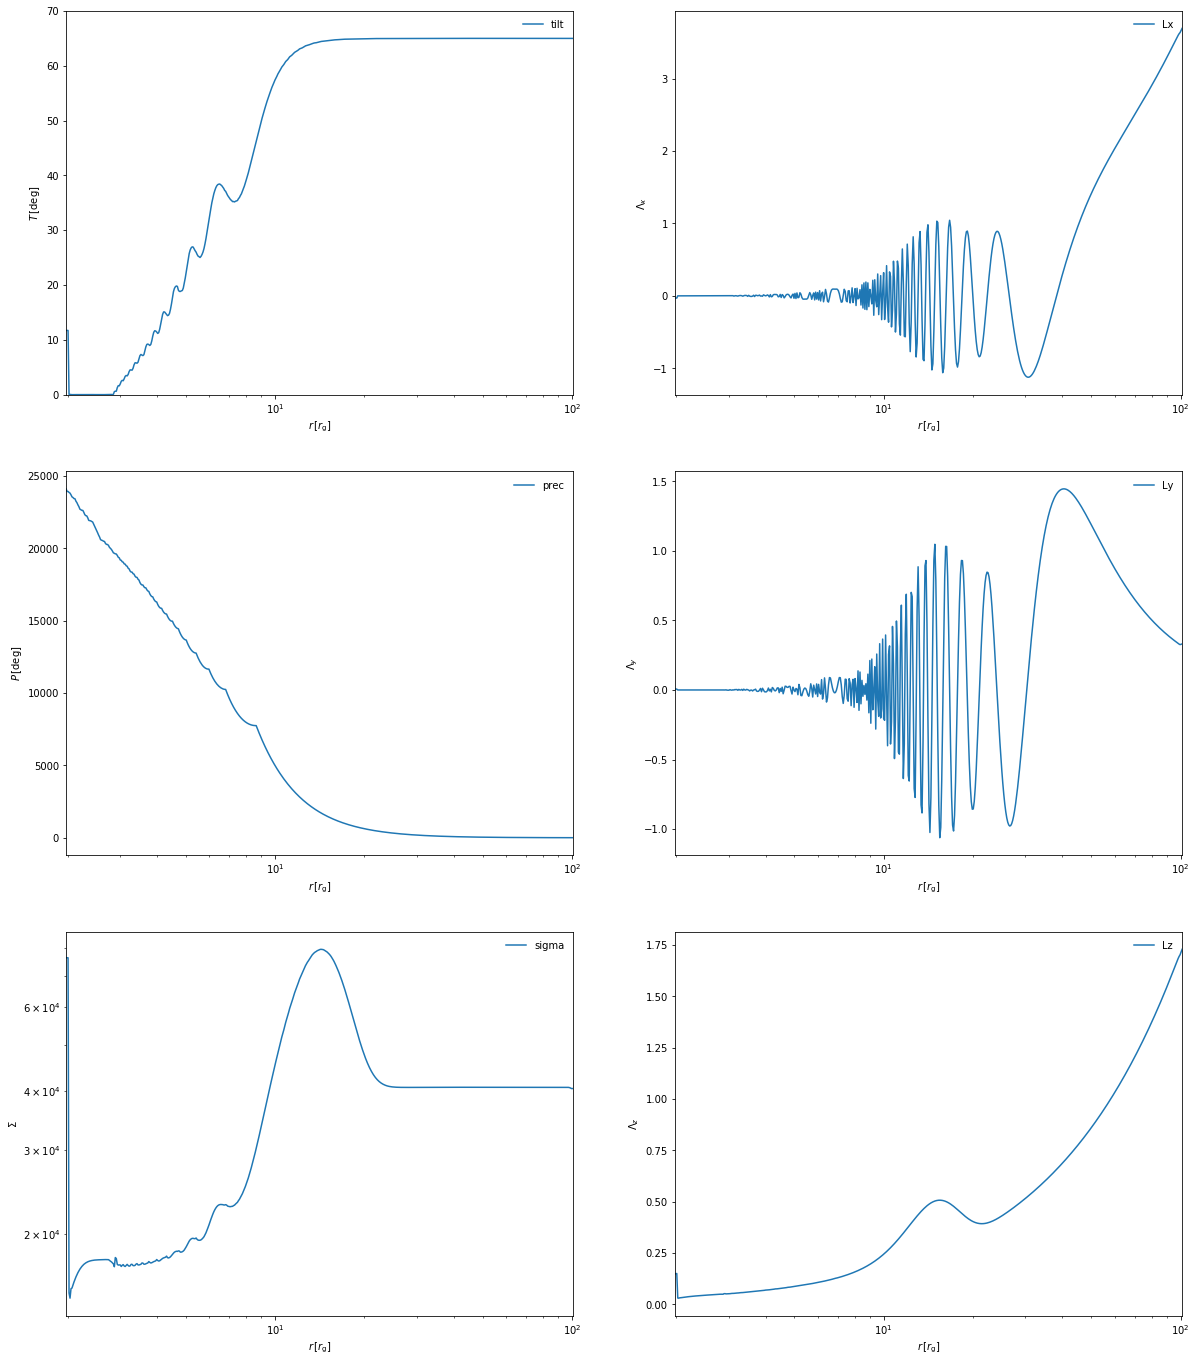

In [10]:
def plot_interface(table):
    plot_r  = table["r"]
    plot_d  = table["sigma"]
    plot_Lx = table["Lx"]
    plot_Ly = table["Ly"]
    plot_Lz = table["Lz"]
    plot_t  = table["tilt"]
    plot_p  = table["prec"]
    plot_dpdt = table["dpdt"]
    
    time   = table["t"][0]
    rmin = np.min(plot_r)
    rmax = np.max(plot_r)
    print "time = %e" % time
    
    fig, ax = plt.subplots(3,2,figsize=(20,24))
    
    ax[0][0].plot(plot_r,plot_t)
    ax[0][0].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[0][0].set_ylabel(r'$T\,[{\rm deg}]$')
    ax[0][0].set_ylim(0,70)
    ax[0][0].set_xlim(rmin,rmax)
    ax[0][0].set_xscale('log')
    ax[0][0].legend(frameon=False)

    ax[1][0].plot(plot_r,plot_p)
    ax[1][0].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[1][0].set_ylabel(r'$P\,[{\rm deg}]$')
    #ax[1][0].set_ylim(-1e-4,1e-4)
    ax[1][0].set_xlim(rmin,rmax)
    ax[1][0].set_xscale('log')
    ax[1][0].legend(frameon=False)

    ax[2][0].plot(plot_r,plot_d)
    ax[2][0].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[2][0].set_ylabel(r'$\Sigma$')
    #ax[2][0].set_ylim(-1e-4,1e-4)
    ax[2][0].set_xlim(rmin,rmax)
    ax[2][0].set_xscale('log')
    ax[2][0].set_yscale('log')
    ax[2][0].legend(frameon=False)

    ax[0][1].plot(plot_r,plot_Lx)
    ax[0][1].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[0][1].set_ylabel(r'$\Lambda_x$')
    #ax[0][1].set_ylim(0,50000)
    ax[0][1].set_xlim(rmin,rmax)
    ax[0][1].set_xscale('log')
    ax[0][1].legend(frameon=False)

    if 1: # Ly
        ax[1][1].plot(plot_r,plot_Ly)
        ax[1][1].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[1][1].set_ylabel(r'$\Lambda_y$')
        #ax[1][1].set_ylim(-50,1)
        ax[1][1].set_xlim(rmin,rmax)
        ax[1][1].set_xscale('log')
        ax[1][1].legend(frameon=False)
    if 0: # dpdt
        ax[1][1].plot(plot_r,plot_dpdt)
        ax[1][1].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[1][1].set_ylabel(r'$\dot{P}$')
        #ax[1][1].set_ylim(-50,1)
        ax[1][1].set_xlim(rmin,rmax)
        ax[1][1].set_xscale('log')
        ax[1][1].legend(frameon=False)


    ax[2][1].plot(plot_r,plot_Lz)
    ax[2][1].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[2][1].set_ylabel(r'$\Lambda_z$')
    #ax[2][1].set_ylim(-1e-3,1e-3)
    ax[2][1].set_xlim(rmin,rmax)
    ax[2][1].set_xscale('log')
    ax[2][1].legend(frameon=False)

    
    return fig

print np.max(full_data[0]["sigma"])
print np.shape(full_data)
fig = plot_interface(full_data[1])

plt.show()
    


time = 2.550671e+06
(2,)


<Figure size 432x288 with 0 Axes>

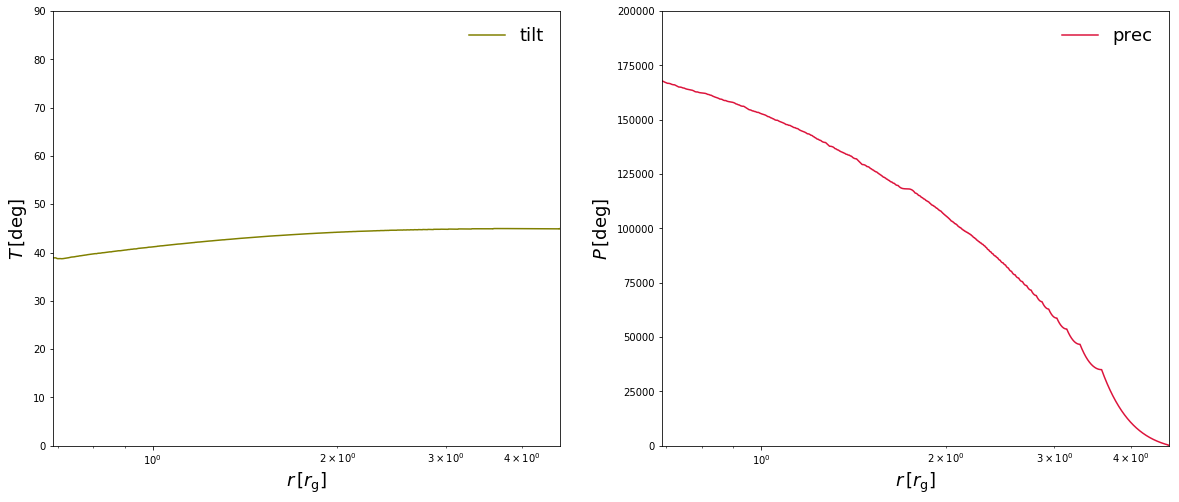

In [13]:
def plot_interface_vid(table):
    plot_r  = table["r"]
    plot_d  = table["sigma"]
    plot_p  = table["prec"]
    plot_t  = table["tilt"]

    time   = table["t"][0]
    rmin = np.min(plot_r)
    rmax = np.max(plot_r)
    print "time = %e" % time
    
    fig, ax = plt.subplots(1,2,figsize=(20,8))

    print np.shape(ax)
    ax[0].plot(plot_r,plot_t,color='olive')
    ax[0].set_xlabel(r'$r\,[r_{\rm g}]$',fontsize=18)
    ax[0].set_ylabel(r'$T\,[{\rm deg}]$',fontsize=18)
    ax[0].set_ylim(0,90)
    ax[0].set_xlim(rmin,rmax)
    ax[0].set_xscale('log')
    ax[0].legend(frameon=False,fontsize=18)

    ax[1].plot(plot_r,plot_p,color='crimson')
    ax[1].set_xlabel(r'$r\,[r_{\rm g}]$',fontsize=18)
    ax[1].set_ylabel(r'$P\,[{\rm deg}]$',fontsize=18)
    ax[1].set_ylim(0,200000)
    ax[1].set_xlim(rmin,rmax)
    ax[1].set_xscale('log')
    #ax[1].set_yscale('log')
    ax[1].legend(frameon=False,fontsize=18)

    return fig

plt.clf()
fig = plot_interface_vid(full_data[-1])
plt.show()

In [14]:
##################
## User Parameters

# Prefix will be appended with 001.png,002.png,003.png,...
path_prefix = "../plots/doesntmatter_"

# Movie path will be appended with .mp4
movie_path = "../plots/t45"

# Make a movie if auto = 1
auto = 1

# Remove all files starting with path_prefix if clean = 1
clean = 0

##
##################

## Call plotting interface to build frames
png_names = []
frame_no = 0
for i in range(0,100,1):
    suffix = str(frame_no).zfill(4)
    fig = plot_interface_vid(full_data[i])
    fig.savefig(path_prefix+suffix)
    png_names.append(path_prefix+suffix + ".png")
    plt.clf()
    frame_no += 1

# Use ffmpeg from command line interface
if (auto):
    !ffmpeg -r 3 -s 1920x1080 -i {path_prefix}%04d.png {movie_path}.mp4

# You can just delete the .png files if you already made your movie
if (clean):
    for name in png_names:
        !rm $name

time = 0.000000e+00
(2,)
time = 2.551039e+04
(2,)
time = 5.102391e+04
(2,)
time = 7.651989e+04
(2,)
time = 1.020320e+05
(2,)
time = 1.275579e+05
(2,)
time = 1.530417e+05
(2,)
time = 1.785479e+05
(2,)
time = 2.040636e+05
(2,)
time = 2.295670e+05
(2,)
time = 2.550814e+05
(2,)
time = 2.805968e+05
(2,)
time = 3.060908e+05
(2,)
time = 3.315989e+05
(2,)
time = 3.570977e+05
(2,)
time = 3.826144e+05
(2,)
time = 4.081267e+05
(2,)
time = 4.336366e+05
(2,)
time = 4.591444e+05
(2,)
time = 4.846365e+05
(2,)
time = 5.101467e+05
(2,)
time = 5.356411e+05
(2,)
time = 5.611509e+05
(2,)
time = 5.866650e+05
(2,)
time = 6.121761e+05
(2,)
time = 6.376687e+05
(2,)
time = 6.631749e+05
(2,)
time = 6.886858e+05
(2,)
time = 7.141960e+05
(2,)
time = 7.396938e+05
(2,)
time = 7.652198e+05
(2,)
time = 7.907215e+05
(2,)
time = 8.162157e+05
(2,)
time = 8.417330e+05
(2,)
time = 8.672321e+05
(2,)
time = 8.927420e+05
(2,)
time = 9.182597e+05
(2,)
time = 9.437532e+05
(2,)
time = 9.692643e+05
(2,)
time = 9.947611e+05
(2,)


<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>